# Importando librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Criando DataFrame

In [3]:
dados = pd.read_excel("Distocia.xlsx", skiprows=1)
dados.head()

,NRO,Situação do parto,Bezerro deste parto,Tipo de prenhez,ECC,Multiparidade,IPC (mês),PS (mês),IEP (mês),Nº SC,...,ST (%),ES (%),CCS 1000x células/ml,ECS,Data do parto,Estações do ano,ITU,Temp (ºC),UR (%),Precipitação (mm)
0,0004X,Ajudado posicionado,Fêmea,TE/FIV,3.5,terceira,NaN,NaN,26.6,7,...,NaN,NaN,NaN,NaN,2013-09-10,inverno,69.385045,23.185208,50.503958,0.000000
1,0011X,Ajudado posicionado,Macho,TE/FIV,4.0,quarta,0.966667,1.433333,17.2,6,...,NaN,NaN,NaN,NaN,2013-02-09,verão,70.298804,22.152500,79.675000,0.000000
2,0024X,Normal,Macho,TE/FIV,3.5,quinta,2.133333,2.766667,20.1,6,...,NaN,NaN,NaN,NaN,2013-12-18,primavera,71.511700,23.753750,65.307500,2.979167
3,0042X,Normal,Fêmea,TE/FIV,3.0,sexta,NaN,NaN,17.4,6,...,NaN,NaN,NaN,NaN,2013-12-28,verão,74.514354,25.080625,75.368750,0.000000
4,0061X,Ajudado posicionado,Natimorto,IA,3.0,sexta,4.200000,4.200000,15.5,3,...,NaN,NaN,NaN,NaN,2014-03-02,verão,72.659058,23.683958,78.758333,0.458333


## Limpando colunas que não são de interesse

In [4]:
dados.drop(["NRO", "Data do parto"], axis=1, inplace=True)
dados.head()

,Situação do parto,Bezerro deste parto,Tipo de prenhez,ECC,Multiparidade,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),...,LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,Estações do ano,ITU,Temp (ºC),UR (%),Precipitação (mm)
0,Ajudado posicionado,Fêmea,TE/FIV,3.5,terceira,NaN,NaN,26.6,7,825.024,...,NaN,NaN,NaN,NaN,NaN,inverno,69.385045,23.185208,50.503958,0.000000
1,Ajudado posicionado,Macho,TE/FIV,4.0,quarta,0.966667,1.433333,17.2,6,824.290,...,NaN,NaN,NaN,NaN,NaN,verão,70.298804,22.152500,79.675000,0.000000
2,Normal,Macho,TE/FIV,3.5,quinta,2.133333,2.766667,20.1,6,3046.213,...,NaN,NaN,NaN,NaN,NaN,primavera,71.511700,23.753750,65.307500,2.979167
3,Normal,Fêmea,TE/FIV,3.0,sexta,NaN,NaN,17.4,6,NaN,...,NaN,NaN,NaN,NaN,NaN,verão,74.514354,25.080625,75.368750,0.000000
4,Ajudado posicionado,Natimorto,IA,3.0,sexta,4.200000,4.200000,15.5,3,3679.795,...,NaN,NaN,NaN,NaN,NaN,verão,72.659058,23.683958,78.758333,0.458333


## Este BD possui uma quantidade alta de Missing Values
### Informações do banco de dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Situação do parto       9120 non-null   object 
 1   Bezerro deste parto     9120 non-null   object 
 2   Tipo de prenhez         9120 non-null   object 
 3   ECC                     8938 non-null   float64
 4   Multiparidade           9119 non-null   object 
 5   IPC (mês)               7469 non-null   float64
 6   PS (mês)                7469 non-null   float64
 7   IEP (mês)               9112 non-null   float64
 8   Nº SC                   9120 non-null   int64  
 9   PA (kg/L/lactação)      8256 non-null   float64
 10  PMD (kg/L/dia)          8256 non-null   float64
 11  PLMD (4%G) (kg/L/dias)  4354 non-null   float64
 12  DEL (dias)              8256 non-null   float64
 13  PAT (kg/L/lactação)     8218 non-null   float64
 14  PMDT (kg/L/dia)         8218 non-null   

# Análise inicial dos missing values
## Percentual de missing values por variável e subdividido em grupos por variável numérica


In [6]:
print(dados.isnull().sum())

Situação do parto            0
Bezerro deste parto          0
Tipo de prenhez              0
ECC                        182
Multiparidade                1
IPC (mês)                 1651
PS (mês)                  1651
IEP (mês)                    8
Nº SC                        0
PA (kg/L/lactação)         864
PMD (kg/L/dia)             864
PLMD (4%G) (kg/L/dias)    4766
DEL (dias)                 864
PAT (kg/L/lactação)        902
PMDT (kg/L/dia)            902
DELA (dias)                902
GORD (%)                  4127
PROT (%)                  4127
LACT (%)                  4127
ST (%)                    4127
ES (%)                    4127
CCS 1000x células/ml      4127
ECS                       4127
Estações do ano              0
ITU                          0
Temp (ºC)                    0
UR (%)                       0
Precipitação (mm)            2
dtype: int64


In [7]:
dados.isnull().groupby(dados['Situação do parto']).mean()

,Situação do parto,Bezerro deste parto,Tipo de prenhez,ECC,Multiparidade,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),...,LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,Estações do ano,ITU,Temp (ºC),UR (%),Precipitação (mm)
Situação do parto,,,,,,,,,,,,,,,,,,,,,
Ajudado difícil,0.0,0.0,0.0,0.009615,0.000000,0.211538,0.211538,0.001374,0.0,0.140110,...,0.549451,0.549451,0.549451,0.549451,0.556319,0.0,0.0,0.0,0.0,0.00000
Ajudado posicionado,0.0,0.0,0.0,0.004831,0.000000,0.171153,0.171498,0.000690,0.0,0.082816,...,0.444444,0.444444,0.444444,0.444444,0.438923,0.0,0.0,0.0,0.0,0.00069
Normal,0.0,0.0,0.0,0.029305,0.000182,0.182199,0.182017,0.000910,0.0,0.095013,...,0.443939,0.443939,0.443939,0.443939,0.445941,0.0,0.0,0.0,0.0,0.00000


In [8]:
dados.select_dtypes(exclude=['object']).isnull().groupby(dados['Situação do parto']).mean()

,ECC,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),PAT (kg/L/lactação),...,PROT (%),LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,ITU,Temp (ºC),UR (%),Precipitação (mm)
Situação do parto,,,,,,,,,,,,,,,,,,,,,
Ajudado difícil,0.009615,0.211538,0.211538,0.001374,0.0,0.140110,0.140110,0.633242,0.140110,0.144231,...,0.549451,0.549451,0.549451,0.549451,0.549451,0.556319,0.0,0.0,0.0,0.00000
Ajudado posicionado,0.004831,0.171153,0.171498,0.000690,0.0,0.082816,0.082816,0.503106,0.082816,0.086957,...,0.444444,0.444444,0.444444,0.444444,0.444444,0.438923,0.0,0.0,0.0,0.00069
Normal,0.029305,0.182199,0.182017,0.000910,0.0,0.095013,0.095013,0.518202,0.095013,0.099199,...,0.443939,0.443939,0.443939,0.443939,0.443939,0.445941,0.0,0.0,0.0,0.00000


## É possível verificar uma quantidade grande de missing values, porém essas variáveis podem ser interessantes para analíse dos dados, portanto, iremos verificar como podemos tratar as mesmas

# Missing Values

## Iremos tratar os missing values de 3 formas distintas e verificar qual retornou o melhor resultado para os testes

### Primeiro método: Deletar linhas e colunas com missing values;
### Segundo método: Imputar missing values com média ou mediana para variáveis contínuas e valor mais frequente para variáveis categóricas;
### Terceiro método: Predizer valores para os missing values;

# Primeiro método: Deletando linhas com missing values

In [9]:
df1 = dados.copy()
df1.shape

(9120, 28)

In [10]:
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)
# Drop igual a True para resetar a contagem do index
df1.shape

(3518, 28)

In [13]:
dados.groupby(dados['Situação do parto']).count()

,Bezerro deste parto,Tipo de prenhez,ECC,Multiparidade,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),...,LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,Estações do ano,ITU,Temp (ºC),UR (%),Precipitação (mm)
Situação do parto,,,,,,,,,,,,,,,,,,,,,
Ajudado difícil,728,728,721,728,574,574,727,728,626,626,...,328,328,328,328,323,728,728,728,728,728
Ajudado posicionado,2898,2898,2884,2898,2402,2401,2896,2898,2658,2658,...,1610,1610,1610,1610,1626,2898,2898,2898,2898,2896
Normal,5494,5494,5333,5493,4493,4494,5489,5494,4972,4972,...,3055,3055,3055,3055,3044,5494,5494,5494,5494,5494


In [14]:

df1.groupby(df1['Situação do parto']).count()

,Bezerro deste parto,Tipo de prenhez,ECC,Multiparidade,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),...,LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,Estações do ano,ITU,Temp (ºC),UR (%),Precipitação (mm)
Situação do parto,,,,,,,,,,,,,,,,,,,,,
Ajudado difícil,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
Ajudado posicionado,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,...,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
Normal,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,...,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095


## Sobraram 3518 linhas para análise

# Métodos para análise de dados que serão utilizados
## K-NN
## Decision Tree
## Suporte Vector Machine
## Naive Bayes
## K-means
## Random Forest

# K-NN

## K - Nearest Neighbors é um algoritmo simples que armazena todos os casos disponíveis e classifica novos casos por maioria de votos de seus vizinhos k.

## Criando variáveis Dummies para trabalhar com dados categóricos para as variáveis "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"

In [15]:
df1["Bezerro deste parto"].value_counts()

Fêmea                  1623
Macho                  1555
Natimorto               154
aborto                   80
Macho-Fêmea              25
Natimorto-Natimorto      19
Macho-Macho              19
Fêmea-Fêmea              18
Macho-Natimorto          13
Fêmea-Natimorto          11
Fêmea-Macho               1
Name: Bezerro deste parto, dtype: int64

In [16]:
df1["Tipo de prenhez"].value_counts()

IA        2682
TE/FIV     836
Name: Tipo de prenhez, dtype: int64

In [17]:
df1["Multiparidade"].value_counts()

primeira    1577
segunda     1053
terceira     562
quarta       205
quinta        81
sexta         31
sextima        7
oitava         2
Name: Multiparidade, dtype: int64

In [18]:
df1["Estações do ano"].value_counts()

inverno      1066
outono        947
verão         801
primavera     704
Name: Estações do ano, dtype: int64

In [19]:
df1 = pd.get_dummies(df1, columns=["Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)

df1.head()

,Situação do parto,ECC,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),...,Multiparidade_primeira,Multiparidade_quarta,Multiparidade_quinta,Multiparidade_segunda,Multiparidade_sexta,Multiparidade_sextima,Multiparidade_terceira,Estações do ano_outono,Estações do ano_primavera,Estações do ano_verão
0,Normal,3.5,3.533333,3.533333,10.8,1,14097.126,41.584,39.899848,339.003607,...,0,0,0,0,0,0,0,1,0,0
1,Ajudado posicionado,4.0,1.733333,21.300000,19.7,6,22553.597,31.280,28.042520,721.022922,...,0,0,0,0,1,0,0,0,0,1
2,Normal,3.5,1.000000,4.966667,17.8,7,7753.593,20.350,18.304825,381.011941,...,0,0,0,0,1,0,0,0,0,1
3,Normal,3.0,1.733333,9.400000,15.6,5,11908.983,40.233,49.225076,296.000373,...,0,0,0,0,1,0,0,1,0,0
4,Ajudado posicionado,3.0,1.366667,3.366667,11.0,1,10529.525,36.060,31.895070,292.000139,...,0,0,0,0,0,1,0,0,0,1


In [20]:
X = df1.drop(columns='Situação do parto').copy()
y = df1['Situação do parto'].copy()

## Sem padronização dos valores

([<matplotlib.axis.XTick at 0x2c1d36fa0d0>,
 <a list of 13 Text xticklabel objects>)

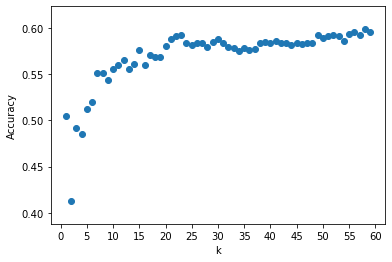

In [21]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

## Com padronização dos valores

([<matplotlib.axis.XTick at 0x2c1d370f340>,
 <a list of 13 Text xticklabel objects>)

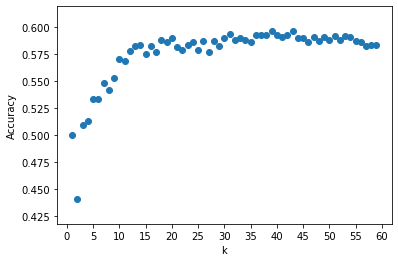

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# Suporte Vector Machine

## Neste algoritmo, cada dado é plotado como um ponto em um espaço n-dimensional (onde n é o número de características que se tem) com o valor de cada característica sendo o valor de uma coordenada particular. Depois encontra-se um(a) linha/plano que divida os dados em grupos diferentes de classificadores.

## Sem padronização dos valores

In [23]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))


Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.59
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.59
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.59
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.59
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.59


In [24]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test)))

Support Vector Classifier:



D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 1.00, Accuracy = 0.24


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.24


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.24


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.24


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.24
Linear kernel, C = 250.00, Accuracy = 0.24


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Com padronização dos valores

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.59
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.58
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.53
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.51
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.60
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.53
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.52
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.59
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.55
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.55


In [54]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0, max_iter=3000).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.61
Linear kernel, C = 5.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.62
Linear kernel, C = 250.00, Accuracy = 0.54


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes

## É uma técnica de classificação baseada no teorema de Bayes que assume a independência entre preditores. Em termos simples, um classificador em Naive Bayes assume que a presença de uma característica particular em uma classe não é relacionada com a presença de nenhuma outra característica. 

In [27]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5647727272727273


# Decision Tree

## A idéia deste algoritmo é dividir os dados em grupos distintos com a melhor precisão possível para estimar valores baseados nesta distribuição.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

depths = [2,3,4,5,6,7,8,9,10]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
    #tree_predicted = classificador.predict(X_test)
    #print("accuracy {:.2f}".format(accuracy_score(y_test, tree_predicted)))

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.57 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.63 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.64 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.66 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.60 no conjunto de dados Teste

Com número máximo de ram

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

features = [2,3,4,5,6,8,10]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.59 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-means

## A idéia do k-means é resolver o problema através de agrupamentos, clusters.

In [30]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['Situação do parto'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.41


# Foi possível verificar que nenhum dos teste apresentados nos retornou um bom resultado em relação a acurácia do teste. Portanto, agora iremos trabalhar com o segundo método para tratativas dos missing values.

# Segundo método: Imputar missing values com média ou mediana para variáveis contínuas e valor mais frequente para variáveis categóricas

In [41]:
df2 = dados.copy()

In [34]:
df2.describe()
# Típico summary() no R

,ECC,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),PAT (kg/L/lactação),...,PROT (%),LACT (%),ST (%),ES (%),CCS 1000x células/ml,ECS,ITU,Temp (ºC),UR (%),Precipitação (mm)
count,8938.000000,7469.000000,7469.000000,9112.000000,9120.000000,8256.000000,8256.000000,4354.000000,8256.000000,8218.000000,...,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,9120.000000,9120.000000,9120.000000,9118.000000
mean,3.196856,1.924483,7.375566,9.034734,3.032346,11954.715814,33.325894,31.512599,361.513455,32088.942261,...,2.997270,4.651612,12.225368,8.719317,285.859804,2.340076,69.477052,22.024651,72.984265,0.818081
std,0.282625,1.519986,5.984447,8.360083,2.400000,5067.861187,7.036547,8.189379,153.236249,17160.058650,...,0.313644,0.229243,1.084865,0.674325,944.933615,2.041661,4.515342,3.149421,13.922783,4.123740
min,2.000000,0.000000,0.133333,0.000000,0.000000,3.142000,0.136000,0.138244,0.003300,59.640000,...,2.200000,1.920000,7.990000,6.490000,1.000000,0.000000,46.400000,0.000000,0.000000,0.000000
25%,3.000000,1.166667,3.066667,0.000000,1.000000,8967.207500,29.285500,26.590539,281.006639,19141.019000,...,2.780000,4.550000,11.590000,8.410000,22.000000,1.000000,66.077965,19.800000,63.950000,0.000000
50%,3.000000,1.733333,5.600000,11.200000,2.000000,11672.355500,33.761500,31.454059,335.006767,30002.487000,...,2.950000,4.670000,12.180000,8.640000,44.000000,2.000000,70.298804,22.164375,73.412083,0.000000
75%,3.500000,2.333333,9.833333,14.600000,4.000000,14694.035750,37.859500,36.318514,441.004926,42573.862250,...,3.170000,4.800000,12.780000,8.900000,121.000000,3.000000,73.007275,24.220208,83.369375,0.062500
max,4.500000,25.566667,58.333333,79.800000,22.000000,44604.612000,60.408000,86.888032,1386.006226,121225.972000,...,5.650000,5.270000,23.580000,16.030000,9999.000000,9.000000,87.207073,38.387895,144.917647,69.100000


## Irei substituir os missing values pela média geral de cada variável numérica

In [42]:
names = df2.select_dtypes(['float']).columns
for i in names:
    df2[i].replace(np.NaN, df2[i].mean(), inplace=True)

## Irei substituir os missing values pelo valor mais frequente de cada variável categórica

In [44]:
df2['Multiparidade'].fillna('primeira', inplace=True)
# Substituido pelo valor mais frequente

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Situação do parto       9120 non-null   object 
 1   Bezerro deste parto     9120 non-null   object 
 2   Tipo de prenhez         9120 non-null   object 
 3   ECC                     9120 non-null   float64
 4   Multiparidade           9120 non-null   object 
 5   IPC (mês)               9120 non-null   float64
 6   PS (mês)                9120 non-null   float64
 7   IEP (mês)               9120 non-null   float64
 8   Nº SC                   9120 non-null   int64  
 9   PA (kg/L/lactação)      9120 non-null   float64
 10  PMD (kg/L/dia)          9120 non-null   float64
 11  PLMD (4%G) (kg/L/dias)  9120 non-null   float64
 12  DEL (dias)              9120 non-null   float64
 13  PAT (kg/L/lactação)     9120 non-null   float64
 14  PMDT (kg/L/dia)         9120 non-null   

## Criando variáveis Dummies para trabalhar com dados categóricos para as variáveis "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"

In [46]:
df2 = pd.get_dummies(df2, columns=["Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)

df2.head()

,Situação do parto,ECC,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),...,Multiparidade_primeira,Multiparidade_quarta,Multiparidade_quinta,Multiparidade_segunda,Multiparidade_sexta,Multiparidade_sextima,Multiparidade_terceira,Estações do ano_outono,Estações do ano_primavera,Estações do ano_verão
0,Ajudado posicionado,3.5,1.924483,7.375566,26.6,7,825.024000,23.572000,31.512599,35.000170,...,0,0,0,0,0,0,1,0,0,0
1,Ajudado posicionado,4.0,0.966667,1.433333,17.2,6,824.290000,9.931000,31.512599,83.001712,...,0,1,0,0,0,0,0,0,0,1
2,Normal,3.5,2.133333,2.766667,20.1,6,3046.213000,29.574000,31.512599,103.003077,...,0,0,1,0,0,0,0,0,1,0
3,Normal,3.0,1.924483,7.375566,17.4,6,11954.715814,33.325894,31.512599,361.513455,...,0,0,0,0,1,0,0,0,0,1
4,Ajudado posicionado,3.0,4.200000,4.200000,15.5,3,3679.795000,28.748000,31.512599,128.001774,...,0,0,0,0,1,0,0,0,0,1


In [47]:
X = df2.drop(columns='Situação do parto').copy()
y = df2['Situação do parto'].copy()

# K-NN

## Sem padronização dos valores

([<matplotlib.axis.XTick at 0x2c1d3e27b80>,
 <a list of 13 Text xticklabel objects>)

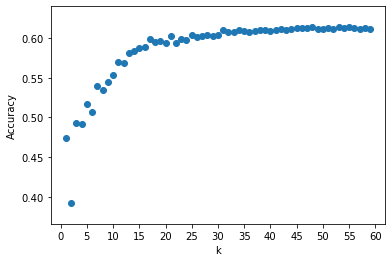

In [48]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

## Com padronização dos valores

([<matplotlib.axis.XTick at 0x2c1d3ef80a0>,
 <a list of 13 Text xticklabel objects>)

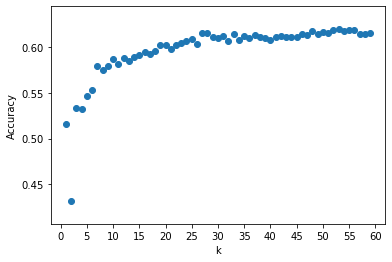

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# Suporte Vector Machine

## Sem padronização dos valores

In [50]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.60
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.62


In [52]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0, max_iter=2000).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test)))

Support Vector Classifier:



D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 1.00, Accuracy = 0.60


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.61
Linear kernel, C = 250.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Com padronização dos valores

In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.58
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.52
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.54
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.51
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.55
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.54


In [57]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0, max_iter=2000).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.61
Linear kernel, C = 5.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.60
Linear kernel, C = 250.00, Accuracy = 0.44


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5491228070175439


# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

depths = [2,3,4,5,6,7,8,9,10]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ram

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

features = [2,3,4,5,6,8,10]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-Means

In [61]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['Situação do parto'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.35


# Foi possível verificar que nenhum dos teste apresentados nos retornou um bom resultado em relação a acurácia do teste, mesmo imputando a média de cada variável. Portanto, agora iremos trabalhar com o terceiro método para tratativas dos missing values.

# Terceiro método: Predizer valores para os missing values;

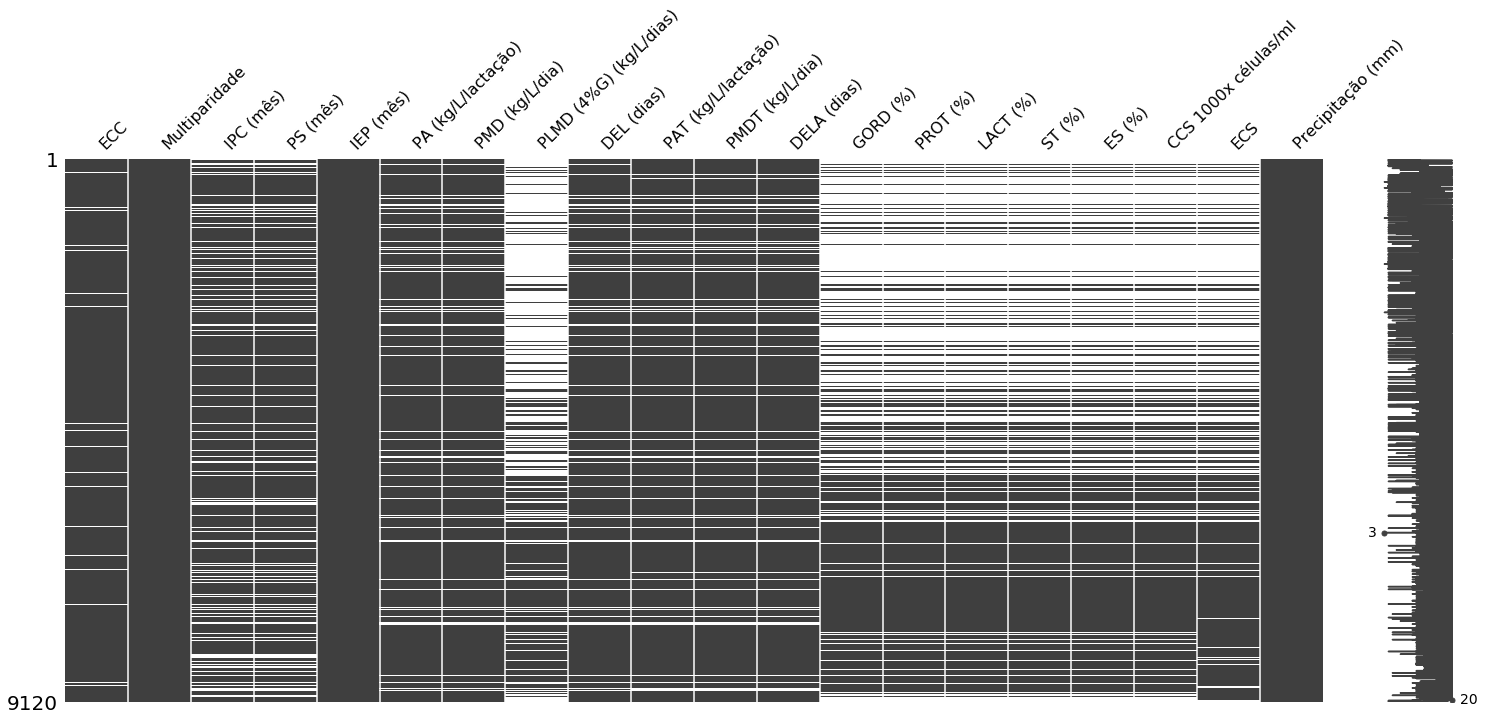

In [62]:
import matplotlib
import missingno as msno

%matplotlib inline

missingdata_dados = dados.columns[dados.isnull().any()].tolist()
msno.matrix(dados[missingdata_dados])

plt.savefig("missing1.png", format='png')

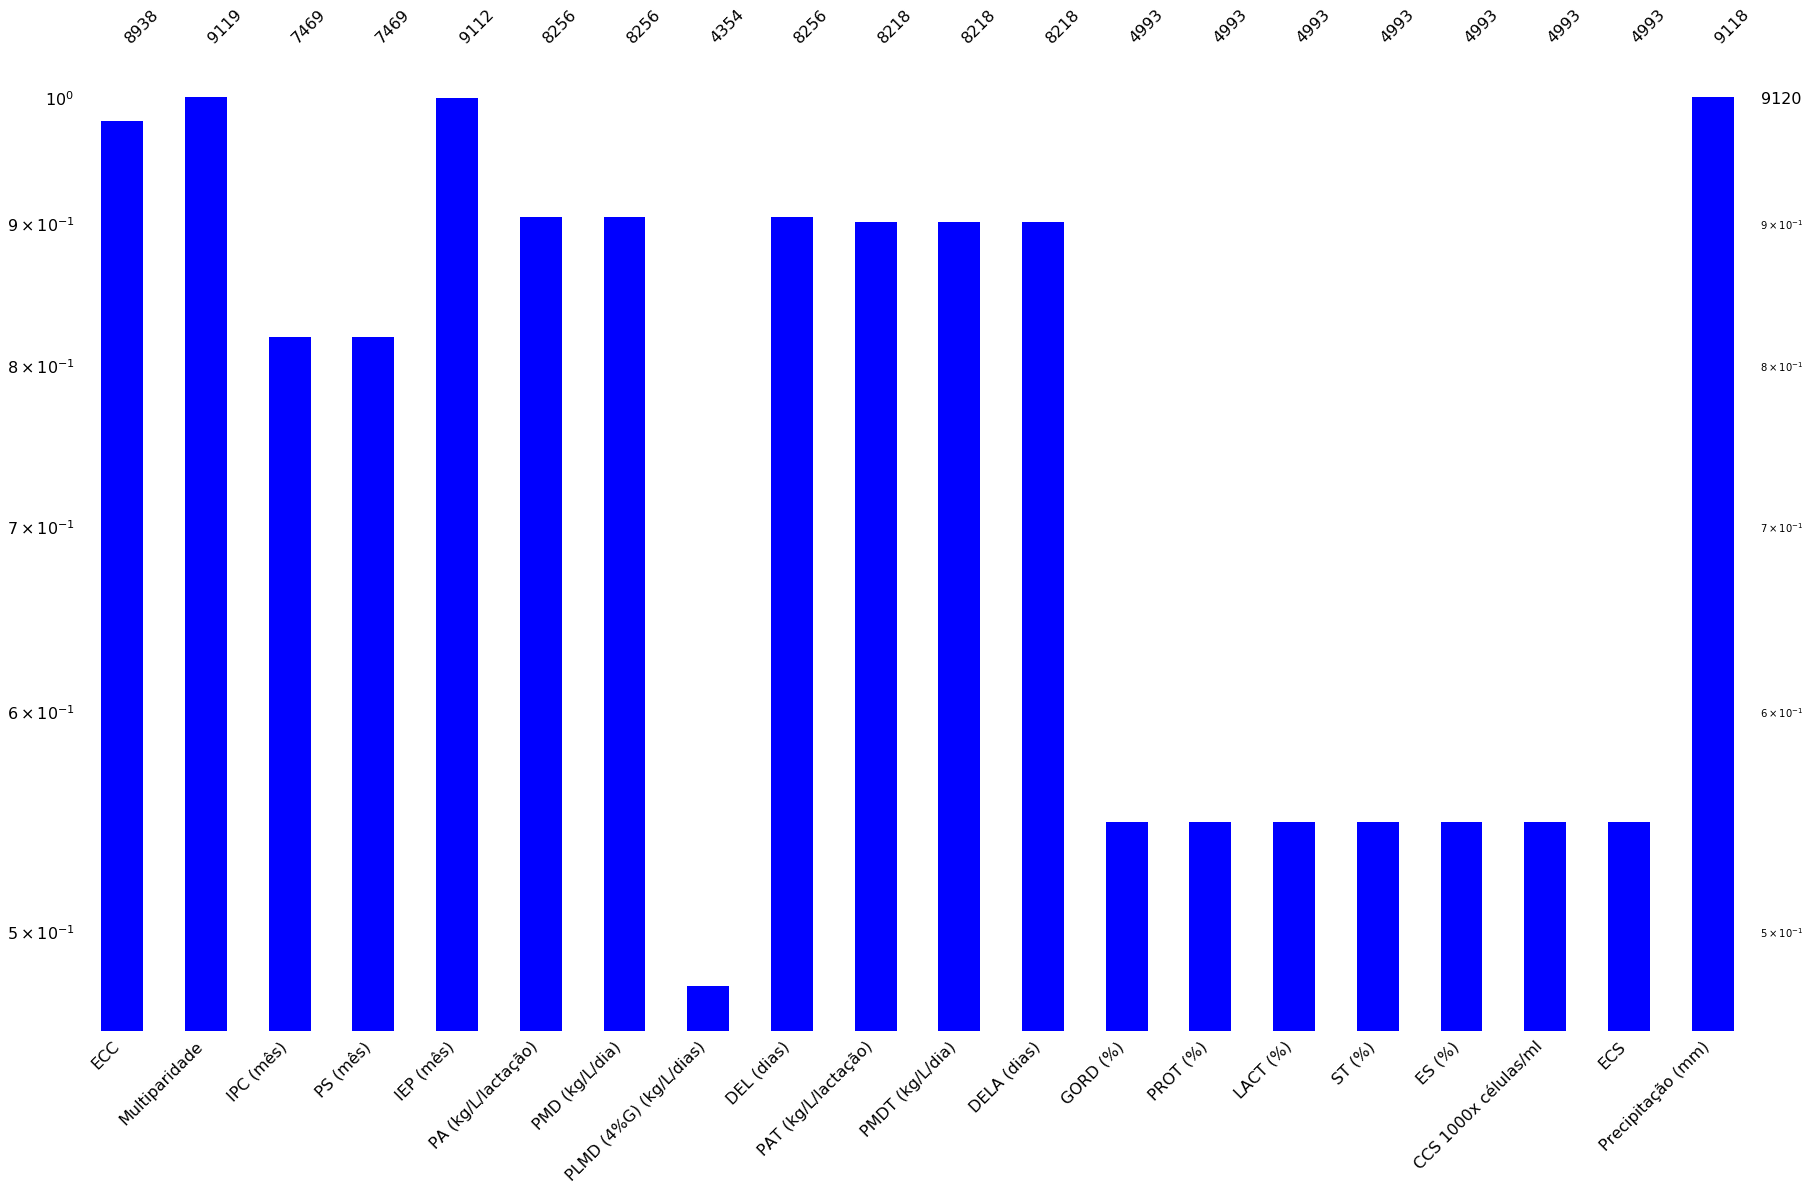

In [63]:
msno.bar(dados[missingdata_dados], color="blue", log=True, figsize=(30,18))

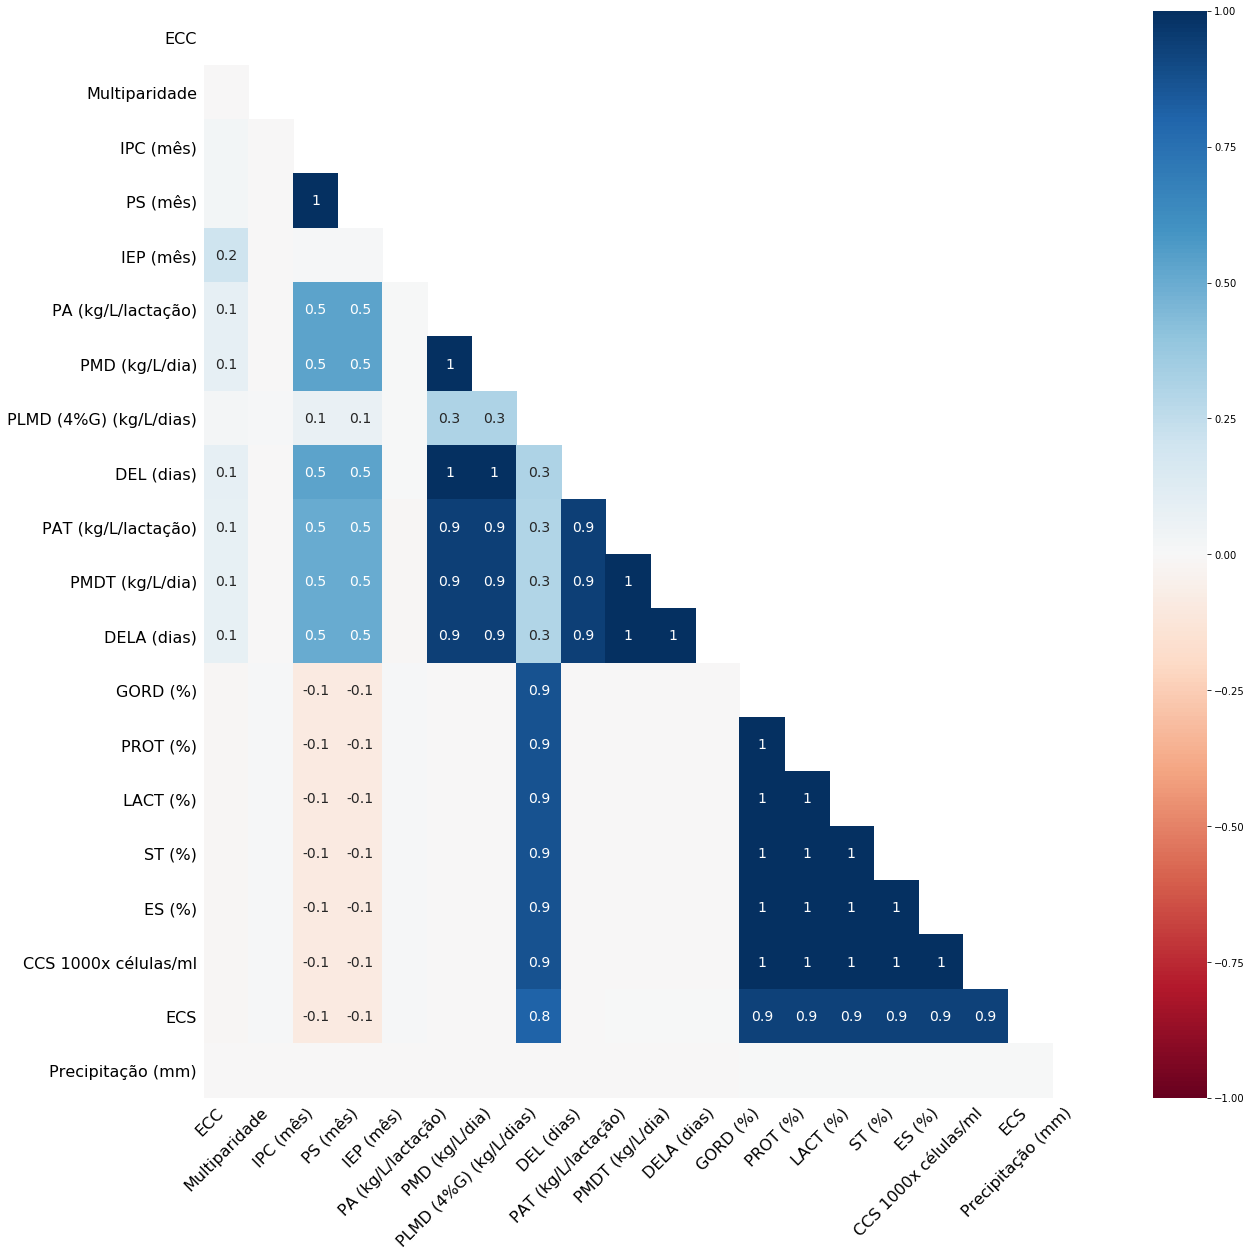

In [65]:
msno.heatmap(dados[missingdata_dados], figsize=(20,20))

In [64]:
tabela = pd.read_excel("Distocia.xlsx", skiprows=1)
tabela = tabela.sort_values('Data do parto')

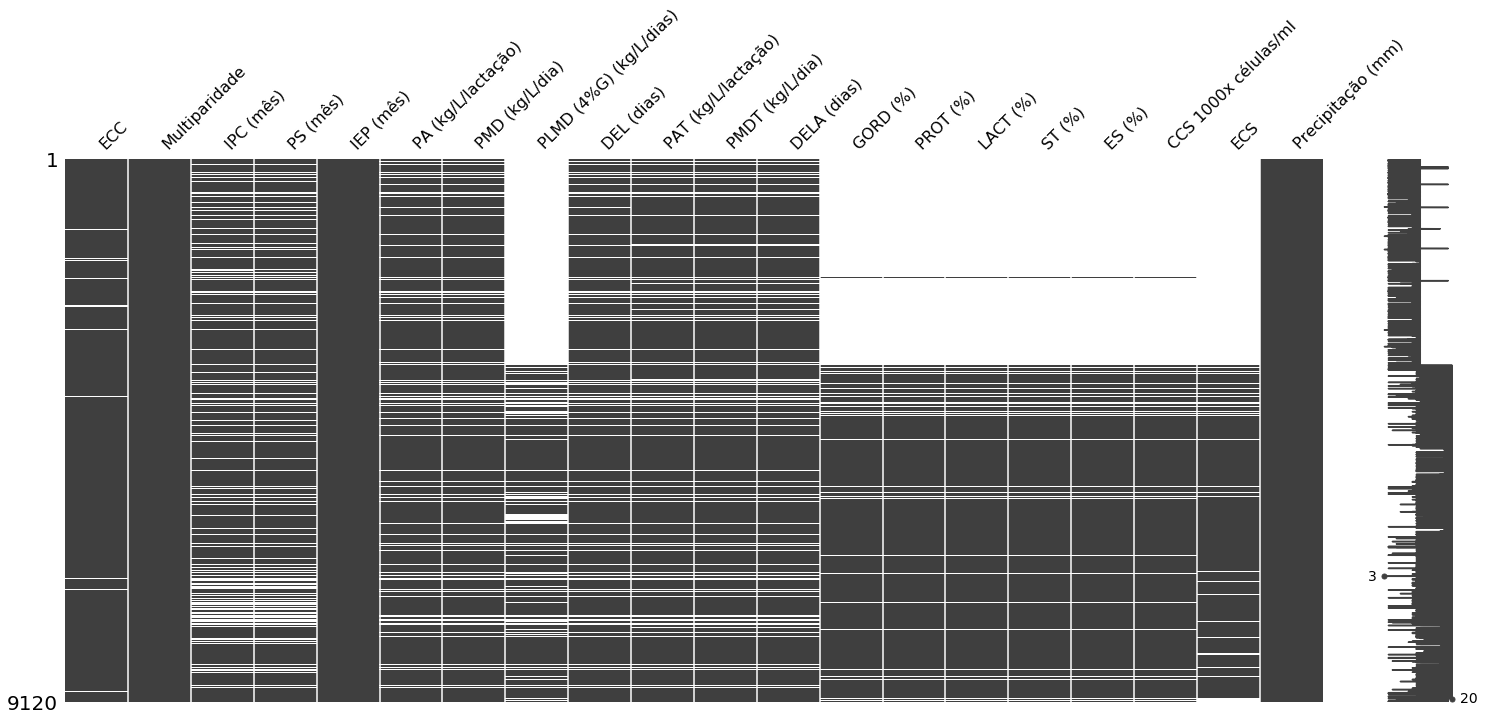

In [66]:
import matplotlib
import missingno as msno

%matplotlib inline
missingdata_tabela = tabela.columns[tabela.isnull().any()].tolist()
msno.matrix(tabela[missingdata_tabela])

plt.savefig("missing2.png", format='png')

In [67]:
tabela_nan = tabela.isna()
#tabela_ECS = tabela['ECS']
count = 0
for i in tabela_nan['ECS']:
    if i == True:
        count += 1
    else:
        break
count

3468

In [68]:
tabela = tabela.iloc[3468:]

In [69]:
tabela.shape

(5652, 30)

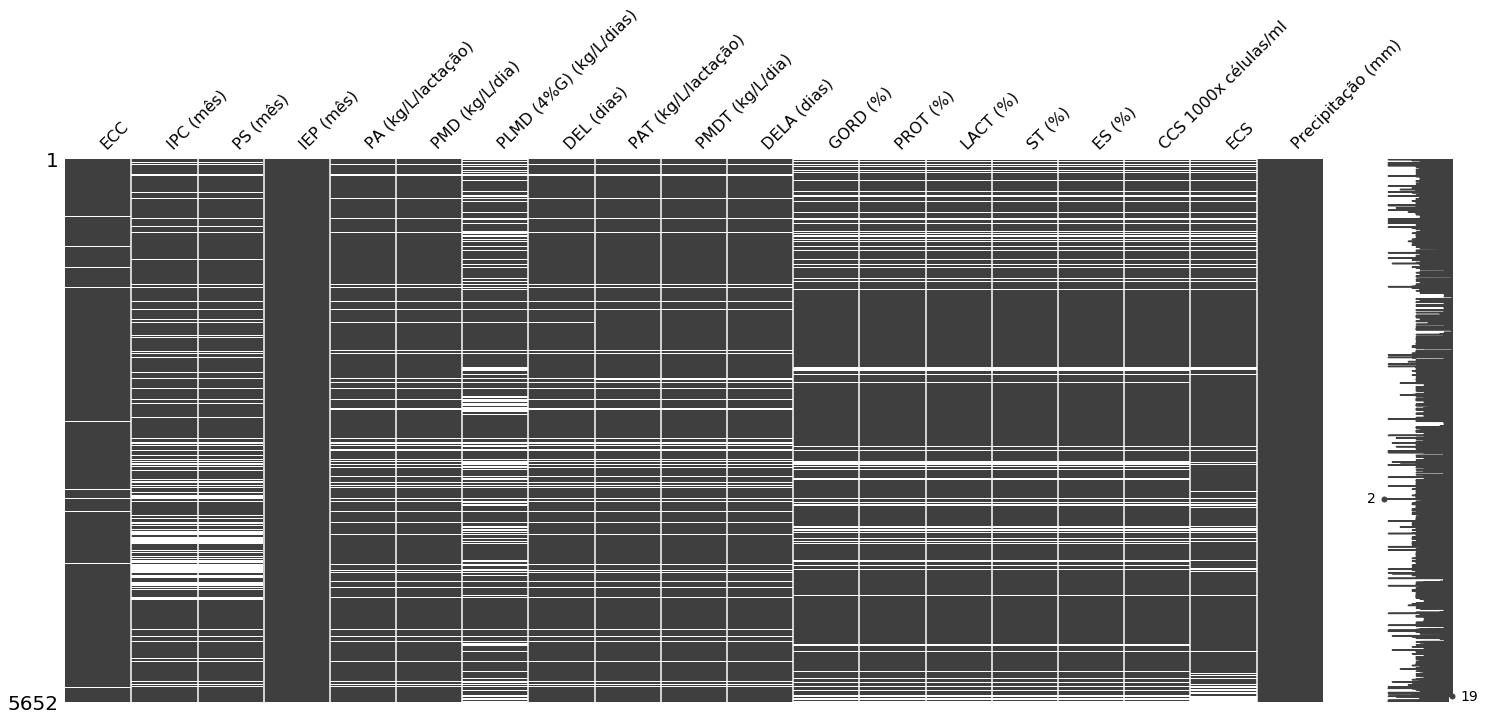

In [70]:
import matplotlib
import missingno as msno

%matplotlib inline
missingdata_tabela = tabela.columns[tabela.isnull().any()].tolist()
msno.matrix(tabela[missingdata_tabela])

plt.savefig("missing3.png", format='png')

In [71]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 3708 to 8345
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NRO                     5652 non-null   object        
 1   Situação do parto       5652 non-null   object        
 2   Bezerro deste parto     5652 non-null   object        
 3   Tipo de prenhez         5652 non-null   object        
 4   ECC                     5536 non-null   float64       
 5   Multiparidade           5652 non-null   object        
 6   IPC (mês)               4442 non-null   float64       
 7   PS (mês)                4441 non-null   float64       
 8   IEP (mês)               5649 non-null   float64       
 9   Nº SC                   5652 non-null   int64         
 10  PA (kg/L/lactação)      5097 non-null   float64       
 11  PMD (kg/L/dia)          5097 non-null   float64       
 12  PLMD (4%G) (kg/L/dias)  4347 non-null   float

# Vou predizer somente essas observações utilizando o pacote MICE no R e depois volto para analisar meu banco de dados

In [72]:
tabela.to_excel("Distocia_reduzida.xlsx")

# Utilizando o banco de dados completo foi utilizado o pacote MICE do R para predizer os valores faltantes, sendo gerado 5 tabelas distintas. 

In [17]:
tabela1 = pd.read_excel("Distocia_full_1.xlsx")

In [19]:
tabela1.head()

,stdp,bzdp,tpdp,ecc,mltp,ipc,ps,iep,ncs,pa,...,lact,st,es,ccs,ecs,esda,itu,temp,ur,prcp
0,Ajudado posicionado,Fêmea,TE/FIV,3.5,terceira,1.466667,1.333333,26.6,7,825.024,...,4.34,10.64,7.68,38,0,inverno,69.385045,23.185208,50.503958,0.000000
1,Ajudado posicionado,Macho,TE/FIV,4.0,quarta,0.966667,1.433333,17.2,6,824.290,...,4.14,13.01,8.22,9862,9,verão,70.298804,22.152500,79.675000,0.000000
2,Normal,Macho,TE/FIV,3.5,quinta,2.133333,2.766667,20.1,6,3046.213,...,4.60,11.84,8.45,513,0,primavera,71.511700,23.753750,65.307500,2.979167
3,Normal,Fêmea,TE/FIV,3.0,sexta,2.100000,2.700000,17.4,6,3361.543,...,4.84,11.98,8.99,15,2,verão,74.514354,25.080625,75.368750,0.000000
4,Ajudado posicionado,Natimorto,IA,3.0,sexta,4.200000,4.200000,15.5,3,3679.795,...,4.77,13.30,8.69,25,3,verão,72.659058,23.683958,78.758333,0.458333


## Trabalhando com a tabela 1

In [21]:
tabela1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stdp    9120 non-null   object 
 1   bzdp    9120 non-null   object 
 2   tpdp    9120 non-null   object 
 3   ecc     9120 non-null   float64
 4   mltp    9120 non-null   object 
 5   ipc     9120 non-null   float64
 6   ps      9120 non-null   float64
 7   iep     9120 non-null   float64
 8   ncs     9120 non-null   int64  
 9   pa      9120 non-null   float64
 10  pmd     9120 non-null   float64
 11  plmd    9120 non-null   float64
 12  del     9120 non-null   float64
 13  pat     9120 non-null   float64
 14  pmdt    9120 non-null   float64
 15  dela    9120 non-null   float64
 16  gord    9120 non-null   float64
 17  prot    9120 non-null   float64
 18  lact    9120 non-null   float64
 19  st      9120 non-null   float64
 20  es      9120 non-null   float64
 21  ccs     9120 non-null   int64  
 22  

In [22]:
tabela1 = pd.get_dummies(tabela1, columns=["bzdp", "tpdp", "mltp", "esda"], drop_first=True)

In [23]:
tabela1.head()

,stdp,ecc,ipc,ps,iep,ncs,pa,pmd,plmd,del,...,mltp_primeira,mltp_quarta,mltp_quinta,mltp_segunda,mltp_sexta,mltp_sextima,mltp_terceira,esda_outono,esda_primavera,esda_verão
0,Ajudado posicionado,3.5,1.466667,1.333333,26.6,7,825.024,23.572,19.937645,35.000170,...,0,0,0,0,0,0,1,0,0,0
1,Ajudado posicionado,4.0,0.966667,1.433333,17.2,6,824.290,9.931,16.070698,83.001712,...,0,1,0,0,0,0,0,0,0,1
2,Normal,3.5,2.133333,2.766667,20.1,6,3046.213,29.574,28.304565,103.003077,...,0,0,1,0,0,0,0,0,1,0
3,Normal,3.0,2.100000,2.700000,17.4,6,3361.543,28.314,25.456485,25.001097,...,0,0,0,0,1,0,0,0,0,1
4,Ajudado posicionado,3.0,4.200000,4.200000,15.5,3,3679.795,28.748,31.066656,128.001774,...,0,0,0,0,1,0,0,0,0,1


In [30]:
X = tabela1.drop(columns='stdp').copy()
y = tabela1['stdp'].copy()

# K-NN sem padronização

([<matplotlib.axis.XTick at 0x18f19c51520>,
 <a list of 13 Text xticklabel objects>)

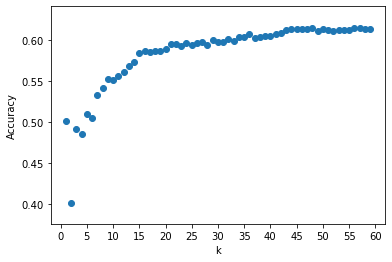

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# K-NN com padronização

([<matplotlib.axis.XTick at 0x18f19cd6490>,
 <a list of 13 Text xticklabel objects>)

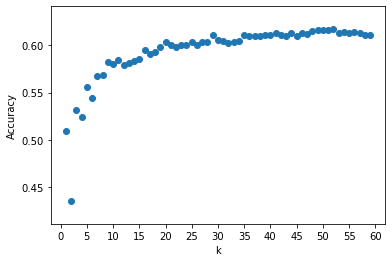

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

## Não houve melhora perceptível em relação ao banco de dados original

# SVC sem padronização

In [33]:
from sklearn.svm import SVC

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.62


In [34]:
from sklearn.svm import LinearSVC

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test)))

Support Vector Classifier:



D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 1.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.61
Linear kernel, C = 250.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# SVC com padronização

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.56
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.50
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.54
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.53
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.60
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.56
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.55


In [37]:
C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.60
Linear kernel, C = 250.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5640350877192982


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

depths = [2,3,4,5,6,7,8,9,10,15,20]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ram

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

features = [2,3,4,5,6,8,10,15,20]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-means

In [49]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['stdp'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.27


## Não foi possível encontrar melhora significativa entre o teste com o banco de dados contendo missing values e este banco de dados com valores preditos para os missing values

# Testar utilizando tabela2

In [73]:
tabela2 = pd.read_excel("Distocia_full_2.xlsx")

tabela2 = pd.get_dummies(tabela2, columns=["bzdp", "tpdp", "mltp", "esda"], drop_first=True)

X = tabela2.drop(columns='stdp').copy()
y = tabela2['stdp'].copy()

# K-NN sem padronização


([<matplotlib.axis.XTick at 0x18f19c9c520>,
 <a list of 13 Text xticklabel objects>)

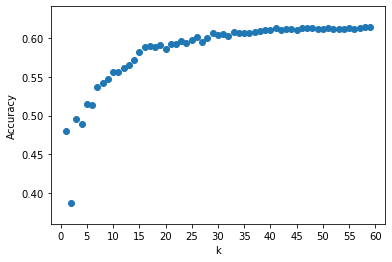

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# K-NN com padronização

([<matplotlib.axis.XTick at 0x18f1971c6d0>,
 <a list of 13 Text xticklabel objects>)

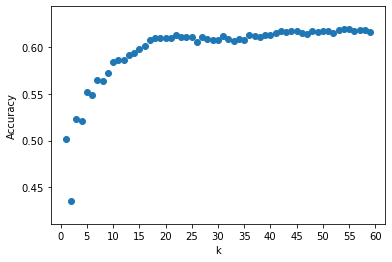

In [55]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# SVC com padronização



In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))


Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.58
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.52
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.54
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.51
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.55
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.54


In [75]:
C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.61
Linear kernel, C = 250.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# SVC sem padronização



In [76]:
print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.60
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.62


In [77]:
from sklearn.svm import LinearSVC

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test))) 

Support Vector Classifier:



D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 1.00, Accuracy = 0.33


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.38
Linear kernel, C = 250.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes



In [58]:
classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5627192982456141


# Decision Tree



In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [2,3,4,5,6,7,8,9,10,15,20]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
    

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.60 no conjunto de dados Teste

Com número máximo de ram

# Random Forest



In [60]:
from sklearn.ensemble import RandomForestClassifier

features = [2,3,4,5,6,8,10,15,20]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
    

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-means



In [61]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['stdp'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.31


# Usando a tabela reduzida

In [78]:
tabela = pd.read_excel("Distocia_reduzidoR.xlsx")

In [79]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stdp    5652 non-null   object 
 1   bzdp    5652 non-null   object 
 2   tpdp    5652 non-null   object 
 3   ecc     5652 non-null   float64
 4   mltp    5652 non-null   object 
 5   ipc     5652 non-null   float64
 6   ps      5652 non-null   float64
 7   iep     5652 non-null   float64
 8   ncs     5652 non-null   int64  
 9   pa      5652 non-null   float64
 10  pmd     5652 non-null   float64
 11  plmd    5652 non-null   float64
 12  del     5652 non-null   float64
 13  pat     5652 non-null   float64
 14  pmdt    5652 non-null   float64
 15  dela    5652 non-null   float64
 16  gord    5652 non-null   float64
 17  prot    5652 non-null   float64
 18  lact    5652 non-null   float64
 19  st      5652 non-null   float64
 20  es      5652 non-null   float64
 21  ccs     5652 non-null   int64  
 22  

In [177]:
tabela = pd.get_dummies(tabela, columns=["bzdp", "tpdp", "mltp", "esda"], drop_first=True)

In [179]:
y = tabela['stdp']
X = tabela.drop('stdp', axis=1)

# K-NN sem padronização

([<matplotlib.axis.XTick at 0x18f27e691f0>,
 <a list of 13 Text xticklabel objects>)

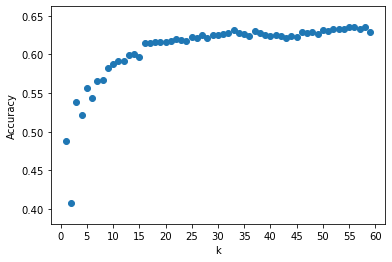

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# K-NN com padronização

([<matplotlib.axis.XTick at 0x18f2a2f9970>,
 <a list of 13 Text xticklabel objects>)

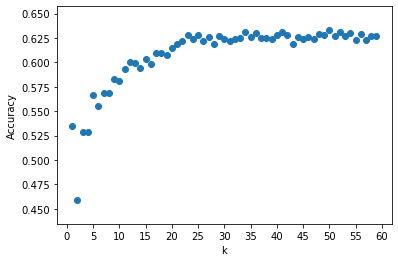

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# SVC sem padronização

In [80]:
print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.60
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.62


In [81]:
from sklearn.svm import LinearSVC

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test))) 

Support Vector Classifier:



D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 1.00, Accuracy = 0.33


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.38
Linear kernel, C = 250.00, Accuracy = 0.38


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# SVC com padronização

In [82]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.58
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.52
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.54
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.51
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.55
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.54


In [83]:
C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.61


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 5.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 10.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 15.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear kernel, C = 100.00, Accuracy = 0.61
Linear kernel, C = 250.00, Accuracy = 0.62


D:\Anaconda3\envs\PyCoursera\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes

In [187]:
classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5598018400566172


# Decision Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [2,3,4,5,6,7,8,9,10,15,20]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
   

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.64 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.63 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.63 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.64 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ram

# Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

features = [2,3,4,5,6,8,10,15,20]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
    

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.63 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.63 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.63 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-means

In [198]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['stdp'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.39
